# Maximum Sub Sequence Problem
Angenommen, man handelt mit Aktien und möchte rückblickend den grössten möglichen Kursgewinn berechnen, d.h. den optimalen Einstiegs- (Kauf) und Ausstiegszeitpunkt (Verkauf) bestimmen. <br> 
Oft sieht
man die Kurse in einem Graphen. Die folgende Abbildung illustriert die Aufgabe.
Bei einem Kursverlauf wie in Abbildung 1 wäre es optimal, wenn man die Aktie A zum grün markierten
Zeitpunkt gekauft und zum rot markierten Zeitpunkt wieder verkauft hätte. Der Kursgewinn hätte dann
dem blauen Pfeil entsprochen.
Der Kursverlauf der Aktie sei als Liste mit den Differenzen von Tag zu Tag gegeben:

In [1]:
stock = [31, -41, 59, 26, -53, 58, 97, -93, -23]

In [2]:
stock_abs = []
for i in range(len(stock)):
    stock_abs.append(sum(stock[:i+1]))
#stock_abs.append(-11)
print(stock_abs)

[31, -10, 49, 75, 22, 80, 177, 84, 61]


In [3]:
high_low = sorted(stock_abs)
high_low.reverse()
found_max = False #to end the first for loop
for i in sorted(stock_abs):
    for e in high_low:
        if stock_abs.index(i) < stock_abs.index(e):
            print("index low:", stock_abs.index(i))
            print("index high:", stock_abs.index(e))
            print("Gewinn:", e-i)
            found_max = True
            break
    if found_max == True:
        break

index low: 1
index high: 6
Gewinn: 187


In [4]:
def max_profit(stock):
    '''
    stock = stock as diff of each day
    returns = max possible profit
    '''
    if len(stock) < 2:
        raise TypeError ("list must have atleast 2 values")
    stock_abs = [] #list with absolute stock values
    for i in range(len(stock)):
        stock_abs.append(sum(stock[:i+1]))
    high_low = sorted(stock_abs)
    high_low.reverse()
    for i in sorted(stock_abs): 
        for e in high_low:
            if stock_abs.index(i) < stock_abs.index(e):
                return e-i


In [5]:
stock = [31, -41, 59, 26, -53, 58, 97, -93, -23]
print( max_profit(stock) )

187


Wie kann man diese Funktion testen? Welche Situationen sollte man testen? Funktioniert die Funktion in
allen Fällen korrekt? <br>
Ich werde testen ob ein hoher Wert am Anfang oder ein Tiefer Wert am Ende das Resultat verändert

In [6]:
import unittest

class TestMaxsubSeq(unittest.TestCase):
    
    def test_lowatend(self):
        data = [-10,1,5,-4,25]
        data_lowatend = data.copy()
        data_lowatend.append(-100)
        self.assertEqual(max_profit(data), max_profit(data_lowatend))
        
    def test_highbeginning(self):
        data = [-10,1,5,-4,25]
        data_highbeginning = data.copy()
        data_highbeginning.insert(0, 100)
        self.assertEqual(max_profit(data), max_profit(data_highbeginning))

unittest.main(argv=[''], verbosity=2, exit=False)

test_highbeginning (__main__.TestMaxsubSeq) ... ok
test_lowatend (__main__.TestMaxsubSeq) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.014s

OK


In [11]:
import numpy as np
import time 
np.random.seed(10)
times = []
for i in [i*100 for i in range(1,50)]:
    data = np.random.randint(low = -100, high=100, size=i)
    start = time.time()
    max_profit(data)
    times.append((time.time()-start)*1000)

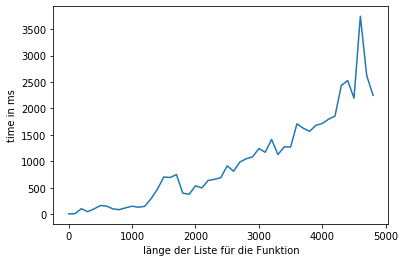

In [16]:
import matplotlib.pyplot as plt
Y = times
X = [i*100 for i  in range(len(times))]
plt.plot(X, Y)
plt.ylabel('time in ms')
plt.xlabel('länge der Liste für die Funktion')
plt.show()